# **Análisis y Reporte sobre el desempeño del modelo**

Francisco Mestizo Hernández A01731549

## **Instrucciones**

Escoge una de las 2 implementaciones que tengas y genera un análisis sobre su desempeño en un set de datos. Este análisis lo deberás documentar en un reporte con indicadores claros y gráficas comparativas que respalden tu análisis.

El análisis debe de contener los siguientes elementos:
* Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
* Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
* Diagnóstico y explicación el grado de varianza: bajo medio alto
* Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

Basándote en lo encontrado en tu análisis utiliza técnicas de regularización o ajuste de parámetros para mejorar el desempeño de tu modelo y documenta en tu reporte cómo mejoró este.

## **Set de datos**

Primero, comenzamos cargando el set de datos que utilizaremos para el modelo.

En este caso serán los datos de **iris**. Este set de datos se puede encontrar en este link:

https://github.com/FranciscoMest02/TC3006/tree/main/retro/M2_ML/Momento%20de%20Retroalimentacion%203%3A%20Analisis%20del%20modelo/data

El set de datos consta de 150 registros, para tres clases diferentes de iris:
* Iris setosa
* Iris versicolor
* Iris virginica

Las variables independientes son el sepal length, sepal width, petal length, pedal width. Todas estas variables son numéricas y estan medidas en centímetros.

Debido a que en el set de datos se listan tres clases, entonces el problema que resolveremos será de clasificación de esas clases dependiendo de las caracteristicas de las plantas.

Comenzamos cargando los datos y haciendo la separación de estos en 20% para training, 40% para validation y 40% para testing.

In [ ]:
#Cargamos los archivos
from google.colab import drive  # importa libreria
drive.mount("/content/gdrive")  # utiliza comando

!pwd

#put your own path in google drive
%cd '/content/gdrive/MyDrive/Tec/ColabAI/iris/'
!ls

import pandas as pd # importar libreria

columns = ["sepal length","sepal width","petal length","petal width", "class"] # definir nombres de columna manualmente
df = pd.read_csv('iris.data', names=columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.sample(frac = 1) #Desordenamos los datos porque vienen por clase
df.head() # mostrar las primeras líneas del dataset que se cargó

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Tec/ColabAI/iris
/content/gdrive/MyDrive/Tec/ColabAI/iris
iris.data  iris.names


,sepal length,sepal width,petal length,petal width,class
149,5.9,3.0,5.1,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor


In [ ]:
from sklearn.model_selection import train_test_split #importamos la funcion para hacer split de los datos

#dividimos en la variable dependiente y las independientes
X = df.drop("class", axis=1)
y = df["class"]

((15, 4), (67, 4), (68, 4))

## **Creación de los modelos**

Para la actividad se usará un arbol de decisión, ya que estamos tratando de clasificar los datos de las iris. El modelo tendrá una desición de entropía como lo hicimos en la clase y una profundidad máxima de tres, ya que es un árbol que no será muy grande.

A continuación se muestra ese modelo y lo vamos a entrenar con diferentes cantidades de datos. El set de datos ira del 5% al 40%.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Creamos el objeto de DecisionTreeClassifier

trainAcc = []
valAcc = []
myTree = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter="best")

# Entrenamos el modelo con los datos
for i in range(60,95,1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
  myTree.fit(X_train, y_train)

  y_pred = myTree.predict(X_train)
  report = classification_report(y_train, y_pred, output_dict=True)
  #print(report)
  trainAcc.append(report['weighted avg']['precision'])

  y_pred = myTree.predict(X_val)
  report = classification_report(y_val, y_pred, output_dict=True)
  valAcc.append(report['weighted avg']['precision'])

Después de realizar el entrenamiento de los modelos y haber guardado la precisión del set de entrenamiento y de validación podemos ver la siguiente gráfica. Es importante mencionar que cada vez que se corre el código se ve un comportamiento similar pero es algo variable. Esto se debe a que el árbol tratará de hacer overfitting a los datos que reciba, por lo tanto los resultados varian mucho conforme a como se separen los datos en cada iteración.

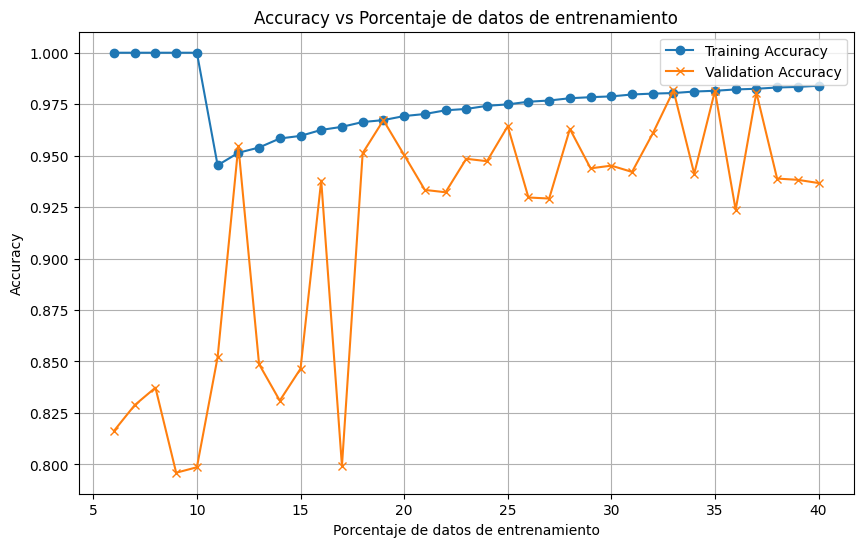

In [ ]:
import matplotlib.pyplot as plt

# Listas de valores
x_values = list(range(40, 5, -1))
y_train = trainAcc
y_val = valAcc

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_train, marker='o', label='Training Accuracy')
plt.plot(x_values, y_val, marker='x', label='Validation Accuracy')

# Etiquetas y título
plt.xlabel('Porcentaje de datos de entrenamiento')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Porcentaje de datos de entrenamiento')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


De esta gráfica podemos interpretar varias cosas. Al inicio, cuando entrenamos con muy pocos datos el modelo tiene **mucho overfitting**, por lo tanto tiene un error muy bajo en el set de entrnamiento, pero no sabe generalizar y falla mucho en el subset de validación. Aquí podemos ver un **sesgo (bias) alto**, ya que parece que como no generaliza, detecta muy bien algunas clases y otras no.

Conforme avanzamos en la gráfica estos resultados se estabilizan, el subset de entrenamiento ya no parece estar memorizando porque falla, pero su error es pequeño y con el subset de validación ya estamos obteniendo también poco error. Aproximadamente entre el 32% y 37% de datos de entrenamiento, tenemos un 95% de precisión. Esto ya es suficiente para la aplicación que estamos haciendo y **el modelo se ajusta bien a los datos**. A primera vista se puede decir que el modelo tiene un **sesgo bajo**, ya que en general identifica bien todas las categorías. Debido a que los datos están gráficados con respecto a accuracy, no podemos confirmar que la **varianza sea baja**, aunque es lo más probable. De todas formas esto lo afirmaremos más adelante cuando probemos el modelo refinado.

Podemos ver que en su mayoría, el modelo reconoce perfectamente la clase de Iris Setosa, ya que en etodas las variaciones solamente la clasificó incorrectamente una vez.

Por otro lado, parece que confunde bastante seguido las clases de iris versicolor y de iris virginica. Sobre estas categorías podemos verificar si tiene algun sesgo o varianza analizando el recall.

Usamos esta metrica ya que nos permite saber cuantas veces una clase tuvo una prediccion correcta (verdaderos positivos).

## **Modelo refinado**

Ahora nos quedaremos con el modelo que tuvo un mejor desempeño. A continuación se imprimen reportes para el set de entrenamiento, de validación y de testing para verificar el bias y la varianza.

In [ ]:
myTree = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter="best")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
myTree.fit(X_train, y_train)

y_pred = myTree.predict(X_train)
report = classification_report(y_train, y_pred)
print("Reporte de entrenamiento")
print(report)
print("")

y_pred = myTree.predict(X_val)
report = classification_report(y_val, y_pred)
print("Reporte de validacion")
print(report)
print("")

y_pred = myTree.predict(X_test)
report = classification_report(y_test, y_pred)
print("Reporte de testing")
print(report)
print("")

Reporte de entrenamiento
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       1.00      0.97      0.99        34
 Iris-virginica       0.97      1.00      0.99        35

       accuracy                           0.99        94
      macro avg       0.99      0.99      0.99        94
   weighted avg       0.99      0.99      0.99        94


Reporte de validacion
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        28
      macro avg       0.92      0.93      0.91        28
   weighted avg       0.95      0.93      0.93        28


Reporte de testing
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicol

Arriba habiamos determinado que el modelo no sufria ni de overfitting ni de underfitting y con estos datos confirmamos que el **modelo se ajusta bien a los datos**.

Además, el sesgo no es tan alto, pero vemos que falla bastante en la precisión de la detección de la tercer categoría (Iris-virginica). Por otro lado, para la Iris-versicolor tiene un recall significativamente más bajo, por lo que tiene a clasificarla incorrectamente (a las iris-versicolor reales les está dando otra etiqueta). Por esto podemos decir que el modelo tiene un **sesgo medio** ya que predice muy bien dos variables pero la tercera puede fallar en bastantes casos.

Por último, el modelo tiene una **varianza baja**, ya que sabe predecir correctamente casi todas las muestras, aunque el modelo todavis tiene pequeños errores al clasificar.